In [1]:
import re
from lxml import etree #파서
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
targetText=etree.parse(open('C:/Users/student/Downloads/Python_JP/word2vec/
                            ted_en-20160408.xml','r',encoding='utf-8'))

In [6]:
parseText="\n".join(targetText.xpath("//content/text()"))

In [7]:
parseText[:100]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo m"

In [8]:
contentText=re.sub('\([^)]*\)','',parseText)
#(배경음) 제거

In [10]:
sentText=sent_tokenize(contentText)
#문장 단위 토근화

In [12]:
#대문자 => 소문자, 구두점 제거(영문, 숫자 제외)
normalizedText=[]
for sent in sentText:
    tokens=re.sub("[^a-z0-9]+"," ",sent.lower())
    normalizedText.append(tokens)
result=[word_tokenize(s) for s in normalizedText]

In [13]:
len(result)#27만여개의 문장으로 구성되어 있다.

273424

In [14]:
for i in result[:5]:
    print(i)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']
['consider', 'facit']
['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them']


In [16]:
from gensim.models import Word2Vec

In [19]:
model=Word2Vec(sentences=result,size=100, window=5,min_count=5, workers=4, sg=0)
# workers 사용 cpu 수

In [21]:
# 임베딩 벡터 차원
# window : 윈도우 크기
# mincount : 최소 5번 이상 등장한 단어
# sg : 스킵그램(1), CBOW(0)
model.wv.most_similar("boy")#코사인 유사도

[('girl', 0.9269815683364868),
 ('kid', 0.8473111391067505),
 ('woman', 0.7955806255340576),
 ('lady', 0.769762396812439),
 ('man', 0.7537623643875122),
 ('mary', 0.7387893795967102),
 ('brother', 0.7174520492553711),
 ('baby', 0.7137607336044312),
 ('sister', 0.7119635939598083),
 ('daughter', 0.7047911882400513)]

In [22]:
model.wv.most_similar(positive=["computer"],topn=20)

[('machine', 0.72453373670578),
 ('robot', 0.7139339447021484),
 ('software', 0.7002605199813843),
 ('camera', 0.6882902383804321),
 ('device', 0.6759814023971558),
 ('program', 0.6723119020462036),
 ('chip', 0.6658679246902466),
 ('video', 0.6602218151092529),
 ('3d', 0.6443661451339722),
 ('simulation', 0.6402535438537598),
 ('printer', 0.6360318660736084),
 ('game', 0.6340721845626831),
 ('mri', 0.6296935081481934),
 ('film', 0.6255951523780823),
 ('keyboard', 0.6254303455352783),
 ('satellite', 0.6119908690452576),
 ('interface', 0.6109451055526733),
 ('mechanical', 0.604297935962677),
 ('prototype', 0.6041160821914673),
 ('laser', 0.6016864776611328)]

In [26]:
model.wv.most_similar(negative=['king'],topn=20)

[('systems', 0.47946661710739136),
 ('produce', 0.43199098110198975),
 ('energy', 0.43111786246299744),
 ('patterns', 0.4256565272808075),
 ('resources', 0.42428404092788696),
 ('solutions', 0.4215591549873352),
 ('processes', 0.41838401556015015),
 ('changes', 0.41782963275909424),
 ('materials', 0.4142676293849945),
 ('plants', 0.4113004505634308),
 ('sustainable', 0.40496277809143066),
 ('adapt', 0.40224066376686096),
 ('create', 0.4010557532310486),
 ('manage', 0.39487361907958984),
 ('devices', 0.3931465744972229),
 ('complex', 0.3887389600276947),
 ('generate', 0.38739949464797974),
 ('improve', 0.38722285628318787),
 ('develop', 0.386164128780365),
 ('gain', 0.3859475255012512)]

In [27]:
import pandas as pd

In [28]:
trainData=pd.read_table("C:/Users/student/Downloads/Python_JP/word2vec/ratings.txt")
#네이버 영화 리뷰 댓글

In [29]:
trainData[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [30]:
len(trainData) #리뷰 20만개

200000

In [36]:
#null 확인
trainData.isnull().sum()
# trainData.info()
# trainData.isnull().values.any() # 단 하나라도 null이면 True

id          0
document    8
label       0
dtype: int64

In [37]:
#Null 값이 있는 행 전체 제거
trainData=trainData.dropna(how='any')#null 행 제거

In [38]:
trainData.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [40]:
trainData['document']=trainData['document'].str.replace("[^가-힣ㄱ-하-ㅣ]" ,"")

In [42]:
trainData['document']

0                                           어릴때보고지금다시봐도재밌어요
1         디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...
2                                 폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고
3                     와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지
4                                       안개자욱한밤하늘에떠있는초승달같은영화
                                ...                        
199995                                              포켓몬스터짜가
199996                                                  쓰레기
199997                            완전사이코영화마지막은더욱더이영화의질을떨어트린다
199998                              왜난재미없었지라따뚜이보고나서스머프봐서그런가
199999                                      포풍저그가나가신다영차영차영차
Name: document, Length: 199992, dtype: object

In [44]:
stopwords=["하다","한","에","와","자","과","걍","잘","좀","는","의","가",
          "이","은","들"]

In [45]:
from konlpy.tag import Okt
import matplotlib.pyplot as plt

In [46]:
okt=Okt()
tokenizedData=[]
for sent in trainData['document']:
    t=okt.morphs(sent,stem=True)#stem true 어근 추출?
    t=[w for w in t if not w in stopwords]
    # t 문장 댓글 하나하나를 형태소 단위로 분리, 
    # 각각의 w가 stopwords에 해당하지 않는다면
    tokenizedData.append(t)

69
10.768730749229968


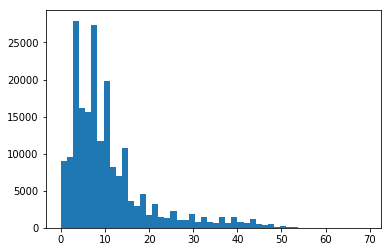

In [47]:
# tokenizedData에 저장된 리뷰에 대해,
# 리뷰 최대 길이
# 리뷰 평균 길이

print(max(len(l) for l in tokenizedData))
# stem : 어근, norm : 표준화
# norm : 그래욬ㅋㅋ => 그래요
print(sum(map(len,tokenizedData))/
     len(tokenizedData))
plt.hist([len(s) for s in tokenizedData],bins=50)
plt.show()

In [48]:
model=Word2Vec(sentences=tokenizedData,
        size=100,
        window=5,
        min_count=5,
        workers=4,
        sg=0)

In [49]:
model.wv.most_similar("주윤발")

[('이정재', 0.8757122755050659),
 ('잭슨', 0.8595262765884399),
 ('조한선', 0.8383086919784546),
 ('크로우', 0.8367531895637512),
 ('유덕화', 0.830194354057312),
 ('최민수', 0.8294483423233032),
 ('이주연', 0.8278473615646362),
 ('스탤', 0.8192455172538757),
 ('김승우', 0.8152163028717041),
 ('윌리스', 0.8148146271705627)]

In [52]:
# 구글 word2vec모델:3백만개 단어벡터

In [54]:
model=Word2Vec.load("C:/Users/student/Downloads/Python_JP/word2vec/ko.bin")

In [60]:
model.wv.most_similar("아저씨")
model.wv.most_similar("모델")
model.wv.most_similar("고객")
model.wv.most_similar("구매")
model.wv.most_similar("추천")

[('컨버터블', 0.6268141269683838),
 ('차종', 0.6252385377883911),
 ('기종', 0.6187839508056641),
 ('고성능', 0.6137087345123291),
 ('제품군', 0.6077162027359009),
 ('니콘', 0.5926024913787842),
 ('모형', 0.591162919998169),
 ('라인업', 0.5850834846496582),
 ('세단', 0.5844414234161377),
 ('인텔', 0.5693677067756653)]